   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.00

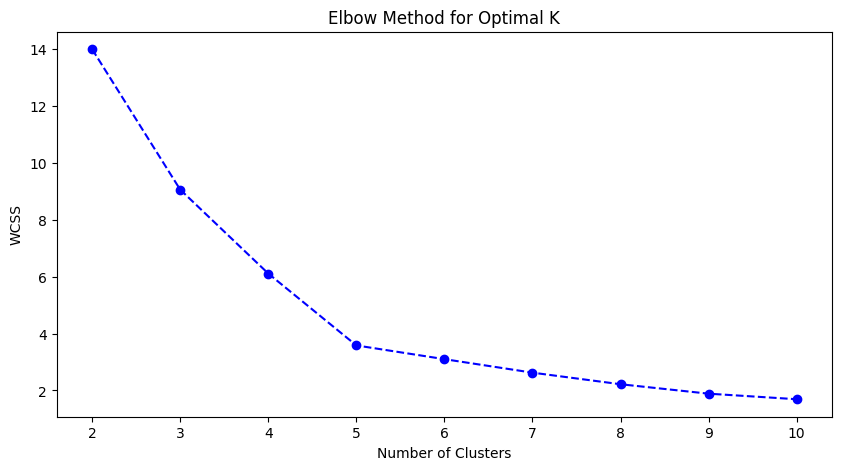

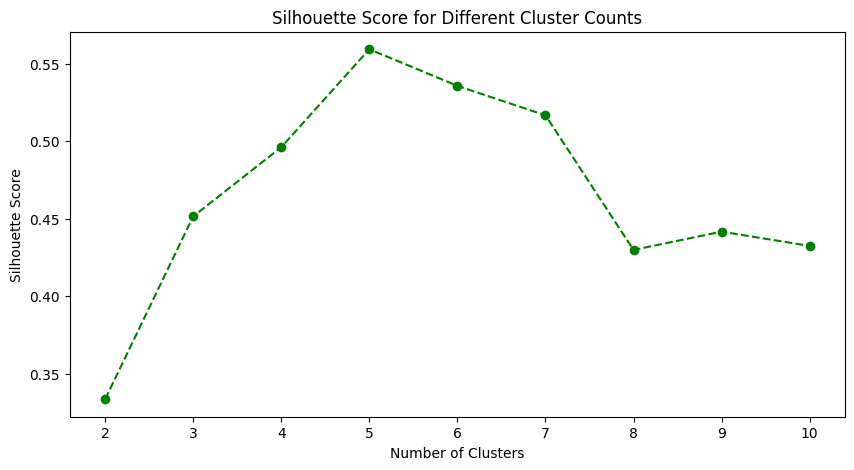

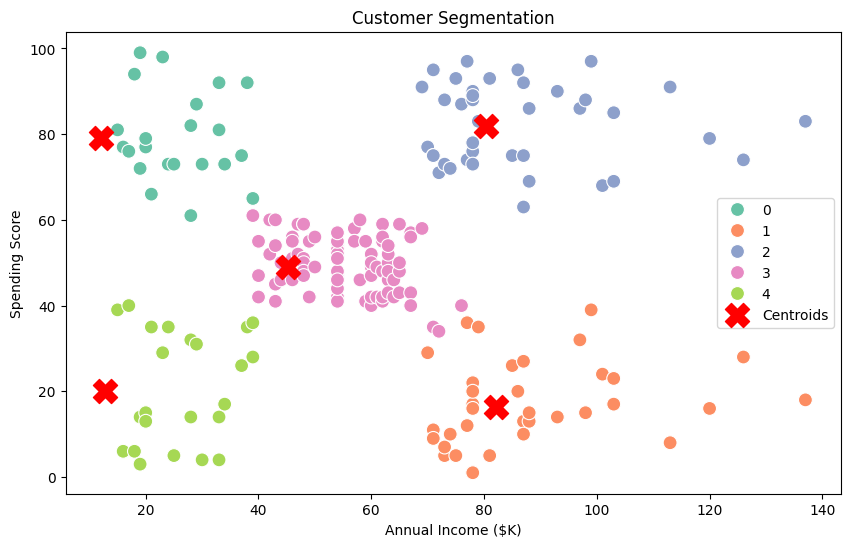


Cluster Summary:
            Avg_Age  Avg_Annual_Income  Avg_Spending_Score  Customer_Count
Cluster                                                                  
0        25.272727          25.727273           79.363636              22
1        41.114286          88.200000           17.114286              35
2        32.692308          86.538462           82.128205              39
3        42.716049          55.296296           49.518519              81
4        45.217391          26.304348           20.913043              23


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Load the dataset
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)

# Step 2: Inspect dataset
print(df.head())  # Show first few rows
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics

# Rename columns for easier access
df.rename(columns={"Annual_Income_(k$)": "Annual_Income", "Spending_Score": "Spending_Score"}, inplace=True)

# Drop CustomerID since it's just an identifier
df.drop(columns=["CustomerID"], inplace=True)

# Step 3: Standardize the Data (MinMaxScaler)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Annual_Income', 'Spending_Score']])
df_scaled = pd.DataFrame(df_scaled, columns=['Annual_Income', 'Spending_Score'])

# Step 4: Find Optimal Clusters using Elbow Method
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Counts')
plt.show()

# Step 5: Apply K-Means Clustering with optimal K (assume 5 based on elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Step 6: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * df['Annual_Income'].max(), 
            kmeans.cluster_centers_[:, 1] * df['Spending_Score'].max(), 
            marker='X', s=300, c='red', label='Centroids')
plt.xlabel('Annual Income ($K)')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

# Step 7: Save clustered dataset
df.to_csv("Clustered_Customers.csv", index=False)

# Step 8: Insights & Recommendations
cluster_summary = df.groupby('Cluster').agg(
    Avg_Age=('Age', 'mean'),
    Avg_Annual_Income=('Annual_Income', 'mean'),
    Avg_Spending_Score=('Spending_Score', 'mean'),
    Customer_Count=('Cluster', 'count')
)
print("\nCluster Summary:\n", cluster_summary)
